---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Subplots de tendencias para la precipitación en JJAS con SPEAR</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
#pip install --user seaborn 

In [8]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.gridspec as gridspec

In [9]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlab,fontsize=16)
    plt.ylabel(ylab,fontsize=16)
    plt.title(title, fontsize=22, pad=20, x=0.74)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [10]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='Coeficiente de regresión', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    # agregamos titulo
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.xaxis.label.set_size(18)  
    cbar.ax.tick_params(labelsize=17) 
    cbar.ax.set_xlabel(cbarlabel)

In [11]:
# Archivo de precipitación SPEAR - por miembro del ensamble
filename='/home/jovyan/ModClim/SPEAR/monthly_ens022.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 1080, lat: 90, lon: 104)> Size: 40MB
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 9kB 1921-01-16T12:00:00 ... 2010-12-16T12:...
  * lat      (lat) float64 720B -0.75 -0.25 0.25 0.75 ... 42.75 43.25 43.75
  * lon      (lon) float64 832B 235.3 235.9 236.6 237.2 ... 298.4 299.1 299.7
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [12]:
pr.units

'kg/m2/s'

In [13]:
# Convertimos unidades
pr=pr*86400
pr['units']='mm day-1'

In [14]:
pr.time

<xarray.DataArray 'time' (time: 1080)> Size: 9kB
array(['1921-01-16T12:00:00.000000000', '1921-02-15T00:00:00.000000000',
       '1921-03-16T12:00:00.000000000', ..., '2010-10-16T12:00:00.000000000',
       '2010-11-16T00:00:00.000000000', '2010-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 9kB 1921-01-16T12:00:00 ... 2010-12-16T12:...
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

In [15]:
pr_years = pr.sel(time=slice('1921', '2010'))

In [16]:
jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [17]:
mean_jjas = jjas.mean('time')

In [18]:
mean_jjas

<xarray.DataArray 'precip' (lat: 90, lon: 104)> Size: 37kB
array([[0.22591417, 0.2254979 , 0.2245764 , ..., 3.3949232 , 3.0439258 ,
        2.7547069 ],
       [0.21240823, 0.21189435, 0.21013013, ..., 3.895466  , 3.6936684 ,
        3.4028993 ],
       [0.20802258, 0.20839487, 0.20712532, ..., 4.664901  , 4.6419535 ,
        4.392039  ],
       ...,
       [1.2494775 , 1.5666449 , 1.4941881 , ..., 4.691112  , 4.708106  ,
        4.7069507 ],
       [1.1682533 , 1.4936545 , 1.7085843 , ..., 4.4019656 , 4.4719396 ,
        4.5134974 ],
       [1.1785315 , 1.5732825 , 1.8481119 , ..., 4.2239385 , 4.2868576 ,
        4.3359213 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 720B -0.75 -0.25 0.25 0.75 ... 42.75 43.25 43.75
  * lon      (lon) float64 832B 235.3 235.9 236.6 237.2 ... 298.4 299.1 299.7
    units    <U8 32B 'mm day-1'

##### **<font color="Navy"> Serie de tiempo del promedio de área de las precipitaciones sobre el centro-sur de México </font>**


In [19]:
# Asignamos pesos con la función coseno
lats = jjas.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [20]:
# Aplicamos peso y luego el promedio espacial
pr_weighted = jjas.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [21]:
# Recortamos México
centrolat=jjas.sel(lat=slice(9.25,33.25))
centrolon=centrolat.sel(lon=slice(242.75,275.75))

centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

pr_annual2=prcentro.resample(time='1Y').mean() # resampleamos a escala anual

#plt.figure(figsize=(13,5))
#plt.plot(pr_annual2.time.dt.year,pr_annual2,c='slateblue',label='1979-2010') 
#lineplot_setup(1979,2010,'Año','[mm day$^{-1}$]',title='Serie de tiempo de la precipitación promedio de México en SPEAR (1979-2010)')
#plt.legend()
#plt.tight_layout()

/opt/conda/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


### **<font color="Steelblue"> Coeficientes de regresión pero seleccionando el centro de México.</font>** 

In [22]:
jjas2 = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [23]:
jjas2.lat

<xarray.DataArray 'lat' (lat: 90)> Size: 720B
array([-0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
        4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,
        9.25,  9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75,
       14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25, 18.75,
       19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.25, 22.75, 23.25, 23.75,
       24.25, 24.75, 25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75,
       29.25, 29.75, 30.25, 30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75,
       34.25, 34.75, 35.25, 35.75, 36.25, 36.75, 37.25, 37.75, 38.25, 38.75,
       39.25, 39.75, 40.25, 40.75, 41.25, 41.75, 42.25, 42.75, 43.25, 43.75])
Coordinates:
  * lat      (lat) float64 720B -0.75 -0.25 0.25 0.75 ... 42.75 43.25 43.75
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_N
    axis:           Y
    bounds:         lat_bnds

In [24]:
jjas2.lon

<xarray.DataArray 'lon' (lon: 104)> Size: 832B
array([235.3125, 235.9375, 236.5625, 237.1875, 237.8125, 238.4375, 239.0625,
       239.6875, 240.3125, 240.9375, 241.5625, 242.1875, 242.8125, 243.4375,
       244.0625, 244.6875, 245.3125, 245.9375, 246.5625, 247.1875, 247.8125,
       248.4375, 249.0625, 249.6875, 250.3125, 250.9375, 251.5625, 252.1875,
       252.8125, 253.4375, 254.0625, 254.6875, 255.3125, 255.9375, 256.5625,
       257.1875, 257.8125, 258.4375, 259.0625, 259.6875, 260.3125, 260.9375,
       261.5625, 262.1875, 262.8125, 263.4375, 264.0625, 264.6875, 265.3125,
       265.9375, 266.5625, 267.1875, 267.8125, 268.4375, 269.0625, 269.6875,
       270.3125, 270.9375, 271.5625, 272.1875, 272.8125, 273.4375, 274.0625,
       274.6875, 275.3125, 275.9375, 276.5625, 277.1875, 277.8125, 278.4375,
       279.0625, 279.6875, 280.3125, 280.9375, 281.5625, 282.1875, 282.8125,
       283.4375, 284.0625, 284.6875, 285.3125, 285.9375, 286.5625, 287.1875,
       287.8125, 288.4375, 289.0625, 289.6875, 290.3125, 290.9375, 291.5625,
       292.1875, 292.8125, 293.4375, 294.0625, 294.6875, 295.3125, 295.9375,
       296.5625, 297.1875, 297.8125, 298.4375, 299.0625, 299.6875])
Coordinates:
  * lon      (lon) float64 832B 235.3 235.9 236.6 237.2 ... 298.4 299.1 299.7
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_E
    axis:           X
    bounds:         lon_bnds

In [25]:
# Seleccionamos el área específica 
area = jjas2.sel(lat=slice(13.75, 23.75))
arealon = area.sel(lon=slice(253.75, 273.5))
# Guardar los datos en netcdf
#arealon.to_netcdf('SPEAR_JJAS_complete.nc')

In [26]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [27]:
years = np.arange(1921, 2011)

In [28]:
mean_precipitation_obs

array([6.449707 , 8.280465 , 7.1856384, 5.967691 , 7.414029 , 6.3739305,
       6.574928 , 6.3046002, 7.196676 , 7.8211937, 6.9271874, 6.5897827,
       7.241578 , 8.572581 , 7.407956 , 4.8616624, 7.721197 , 6.4535165,
       6.018086 , 7.2464457, 7.967323 , 8.537132 , 6.2320557, 5.9222436,
       5.460392 , 5.8002534, 7.490885 , 5.694996 , 6.108644 , 5.8015757,
       6.3050494, 5.7279654, 5.55857  , 6.2383547, 6.6537056, 7.4703717,
       8.334014 , 7.0662413, 5.131381 , 6.0207253, 6.6297884, 6.1289253,
       8.123363 , 5.7438602, 6.770974 , 5.549821 , 6.2138586, 6.47876  ,
       6.2250786, 6.602836 , 6.2065973, 6.565446 , 6.545384 , 5.56717  ,
       5.5177884, 6.068629 , 5.9814277, 6.2348785, 6.277104 , 7.580511 ,
       6.0471444, 6.7183547, 5.979166 , 7.776995 , 6.716092 , 5.288538 ,
       6.68993  , 5.2223215, 7.0406466, 7.4130807, 5.3193765, 5.7259045,
       6.6615834, 6.2148004, 5.4339824, 7.82952  , 8.394306 , 5.5737224,
       4.8451424, 7.9129157, 6.208783 , 5.9631705, 

In [29]:
X2=years
y2=mean_precipitation_obs

In [30]:
X2

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010])

In [31]:
# Calculando pendiente (beta1) y la intersección en el eje y (beta0)
m2 = np.sum((X2 - np.mean(X2)) * (y2 - np.mean(y2))) / np.sum((X2 - np.mean(X2))**2)
b2 =  np.mean(y2) - m2 * np.mean(X2)
m2_siglo=m2*100
m2_siglo
#np.save('pendiente_030_SPEAR.npy',m2)

np.float64(-0.6763747337301429)

In [32]:
print(f'Pendiente (beta 1): {m2}')
print(f'Ordenada al origen (beta 0): {b2}')

Pendiente (beta 1): -0.0067637473373014295
Ordenada al origen (beta 0): 19.822411344529925


In [33]:
# Ec. de regresión lineal
predicciones2= b2 + m2 * X2
#np.savetxt('predicciones_01_SPEAR.txt', y2)
#np.save('predicciones_030_SPEAR.npy', predicciones2)
predicciones2

array([6.82925271, 6.82248896, 6.81572521, 6.80896147, 6.80219772,
       6.79543397, 6.78867023, 6.78190648, 6.77514273, 6.76837898,
       6.76161524, 6.75485149, 6.74808774, 6.74132399, 6.73456025,
       6.7277965 , 6.72103275, 6.714269  , 6.70750526, 6.70074151,
       6.69397776, 6.68721402, 6.68045027, 6.67368652, 6.66692277,
       6.66015903, 6.65339528, 6.64663153, 6.63986778, 6.63310404,
       6.62634029, 6.61957654, 6.61281279, 6.60604905, 6.5992853 ,
       6.59252155, 6.58575781, 6.57899406, 6.57223031, 6.56546656,
       6.55870282, 6.55193907, 6.54517532, 6.53841157, 6.53164783,
       6.52488408, 6.51812033, 6.51135658, 6.50459284, 6.49782909,
       6.49106534, 6.4843016 , 6.47753785, 6.4707741 , 6.46401035,
       6.45724661, 6.45048286, 6.44371911, 6.43695536, 6.43019162,
       6.42342787, 6.41666412, 6.40990037, 6.40313663, 6.39637288,
       6.38960913, 6.38284539, 6.37608164, 6.36931789, 6.36255414,
       6.3557904 , 6.34902665, 6.3422629 , 6.33549915, 6.32873

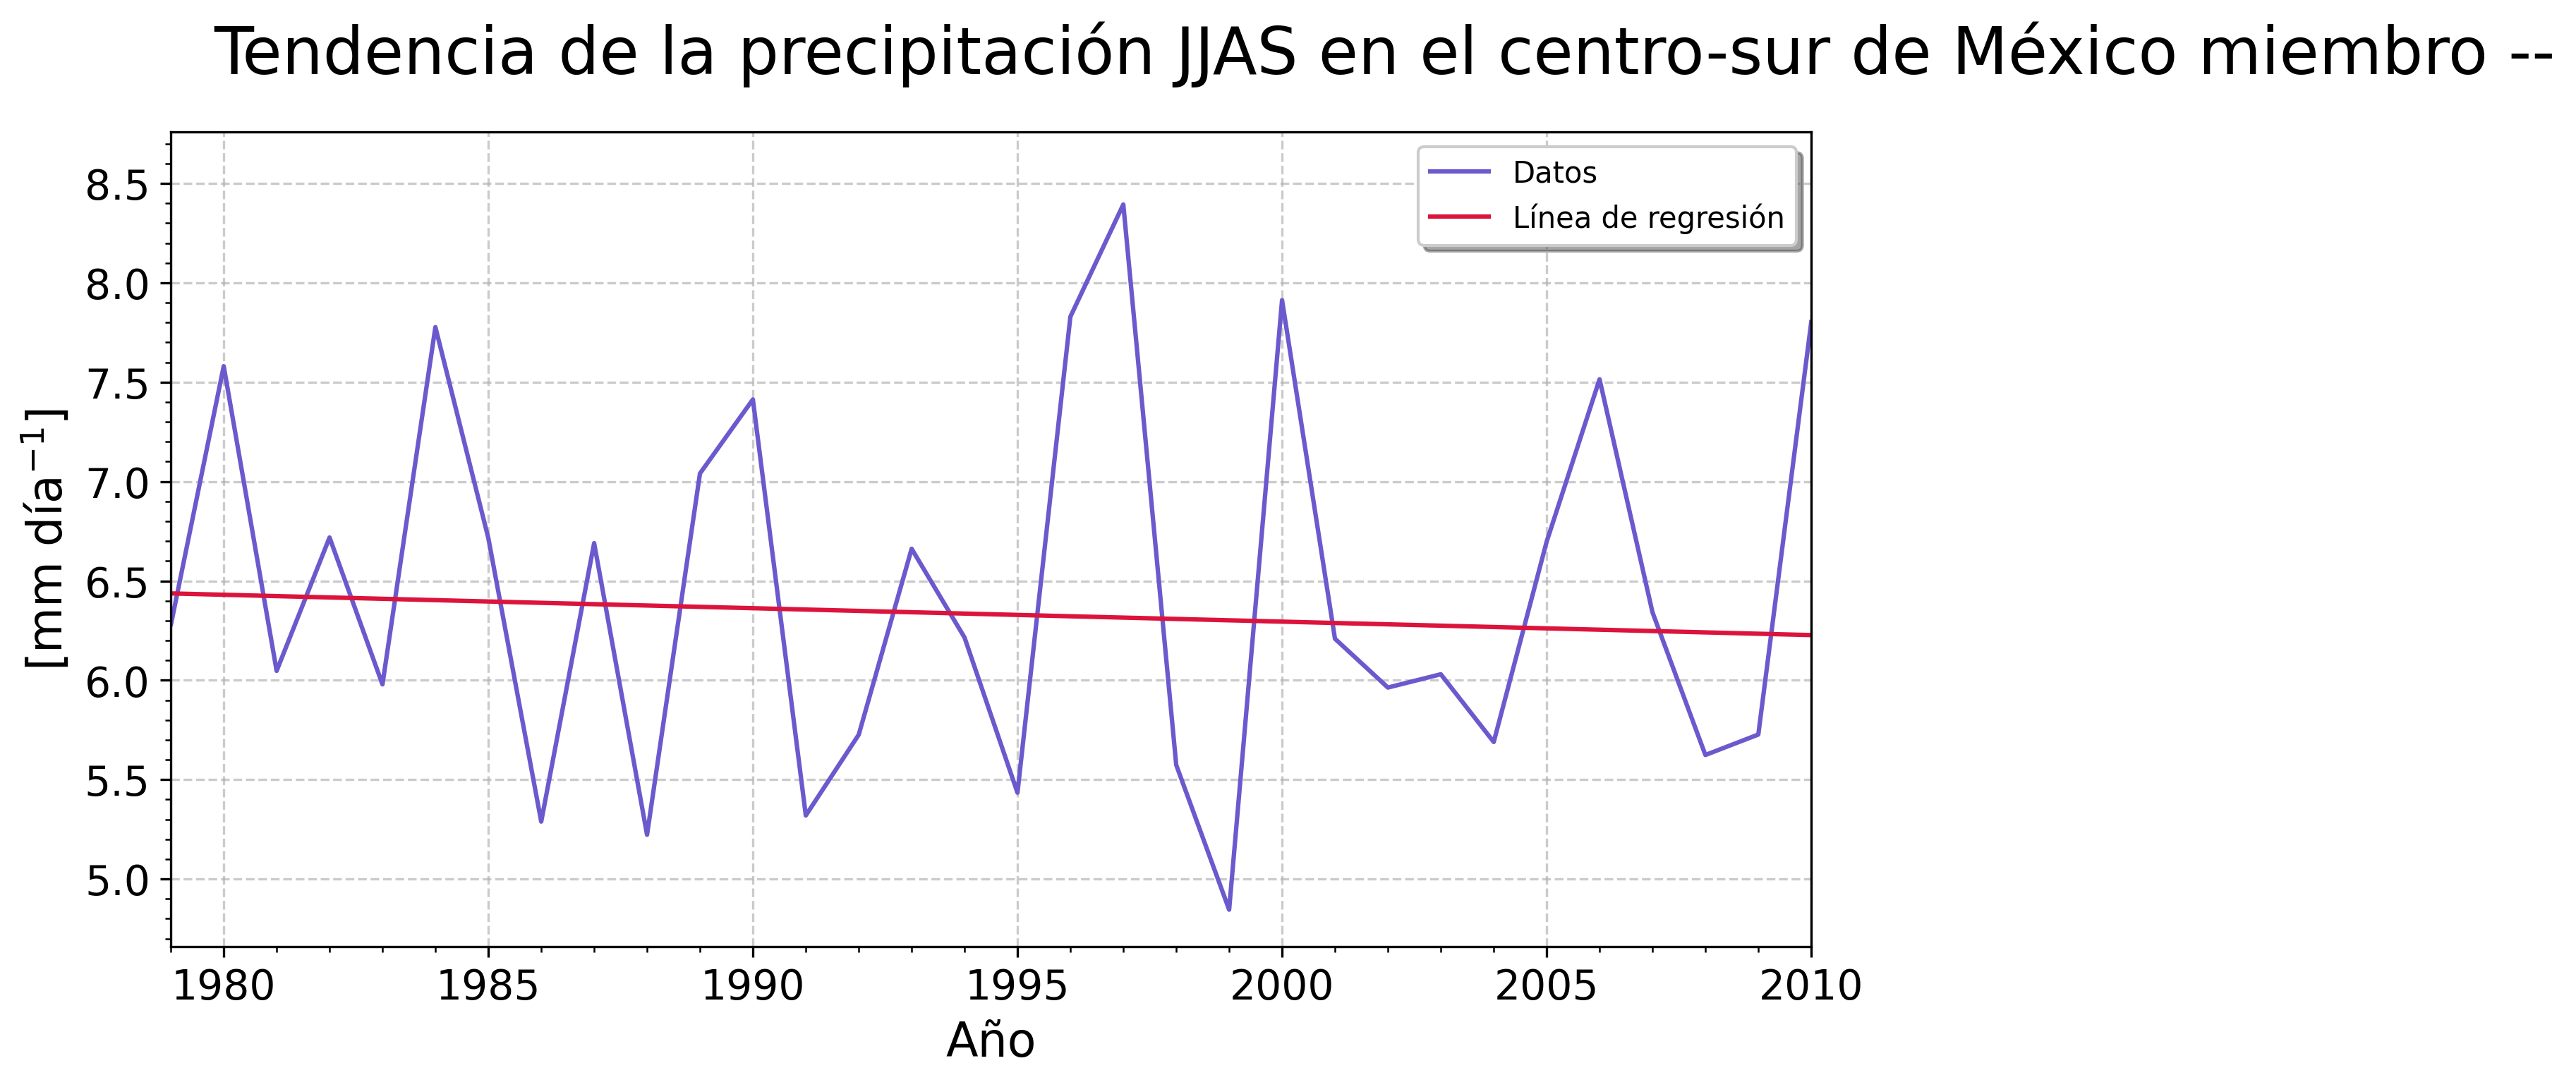

In [34]:
import matplotlib.ticker as ticker

# Graficamos los datos y la línea de regresión
plt.figure(figsize=(10,5), dpi=300)
plt.plot(X2, y2, color='slateblue', label='Datos')
plt.plot(X2, predicciones2, color='crimson', label='Línea de regresión')
plt.text(0.05, 0.95, '', transform=plt.gca().transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))
lineplot_setup(1979,2010,'Año','[mm día$^{-1}$]',title='Tendencia de la precipitación JJAS en el centro-sur de México miembro --',legend=True)
ax = plt.gca()  

In [35]:
# Funcion para el coeficiente de regresión
def reg_coef(X,y):
    m=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    b = np.mean(y) - m * np.mean(X)
    return m,b

# Se inicializa
coef_matriz_m = np.zeros((len(arealon.lat), len(arealon.lon)))
coef_matriz_b = np.zeros((len(arealon.lat), len(arealon.lon)))

for i, lat in enumerate(arealon.lat):
    for j, lon in enumerate(arealon.lon):
        # Calculamos los coeficientes de regresión 
        y = arealon.sel(lat=lat, lon=lon).groupby('time.year').mean(dim='time').values
        X = years
        m,b = reg_coef(X,y)
        
        # Guardamos m y b en la matriz
        coef_matriz_m[i, j] = m
        coef_matriz_b[i, j] = b

In [36]:
 print(m)

0.000973189167070277


In [37]:
#arealon.lat
arealon.lon

<xarray.DataArray 'lon' (lon: 32)> Size: 256B
array([254.0625, 254.6875, 255.3125, 255.9375, 256.5625, 257.1875, 257.8125,
       258.4375, 259.0625, 259.6875, 260.3125, 260.9375, 261.5625, 262.1875,
       262.8125, 263.4375, 264.0625, 264.6875, 265.3125, 265.9375, 266.5625,
       267.1875, 267.8125, 268.4375, 269.0625, 269.6875, 270.3125, 270.9375,
       271.5625, 272.1875, 272.8125, 273.4375])
Coordinates:
  * lon      (lon) float64 256B 254.1 254.7 255.3 255.9 ... 272.2 272.8 273.4
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_E
    axis:           X
    bounds:         lon_bnds

In [38]:
print(coef_matriz_m.shape)  
print(len(arealon.lat), len(arealon.lon))  

(21, 32)
21 32


In [39]:
print(np.nanmin(coef_matriz_m), np.nanmax(coef_matriz_m))

-0.02568400091716143 0.00981902702505188


In [40]:
min_val_new = -0.03175466481934395
max_val_new = 0.021010708475987617
range_total_new = max_val_new - min_val_new
r=range_total_new/2
r

0.026382686647665785

In [41]:
coef_matriz_m_da = xr.DataArray(coef_matriz_m, coords=[arealon.lat, arealon.lon], dims=["lat", "lon"])
#coef_matriz_m_da.to_netcdf('coeficientes_regresion_SPEARsin_complete.nc')

levels = np.linspace(-10,10, 21) 

# Graficamos la matriz 
mapa_MC(coef_matriz_m_da, levels, 'BrBG', 'Coeficientes de regresión de la precipitación JJAS (1921-2010) en SPEAR', 
        extend='both', cbarlabel='Coeficiente de regresión  [mm día$^{-1}$ siglo$^{-1}$]', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

In [42]:
# Promedio del ensamble 
mean_precipitation_ensemble = np.load('lineareg_spear_mean_ens30.npy')  
mean_precipitation_ensemble 

array([6.44865177, 6.44939712, 6.45014248, 6.45088783, 6.45163319,
       6.45237855, 6.4531239 , 6.45386926, 6.45461461, 6.45535997,
       6.45610533, 6.45685068, 6.45759604, 6.45834139, 6.45908675,
       6.45983211, 6.46057746, 6.46132282, 6.46206817, 6.46281353,
       6.46355889, 6.46430424, 6.4650496 , 6.46579495, 6.46654031,
       6.46728567, 6.46803102, 6.46877638, 6.46952173, 6.47026709,
       6.47101245, 6.4717578 , 6.47250316, 6.47324851, 6.47399387,
       6.47473922, 6.47548458, 6.47622994, 6.47697529, 6.47772065,
       6.478466  , 6.47921136, 6.47995672, 6.48070207, 6.48144743,
       6.48219278, 6.48293814, 6.4836835 , 6.48442885, 6.48517421,
       6.48591956, 6.48666492, 6.48741028, 6.48815563, 6.48890099,
       6.48964634, 6.4903917 , 6.49113706, 6.49188241, 6.49262777,
       6.49337312, 6.49411848, 6.49486384, 6.49560919, 6.49635455,
       6.4970999 , 6.49784526, 6.49859062, 6.49933597, 6.50008133,
       6.50082668, 6.50157204, 6.5023174 , 6.50306275, 6.50380

In [43]:
# Están en orden los miembros
predicciones = []
for i in range(1, 31):
    archivo = f'predicciones_0{i}_SPEAR.npy'
    datos = np.load(archivo)
    predicciones.append(datos)

In [44]:
#print(predicciones[20])

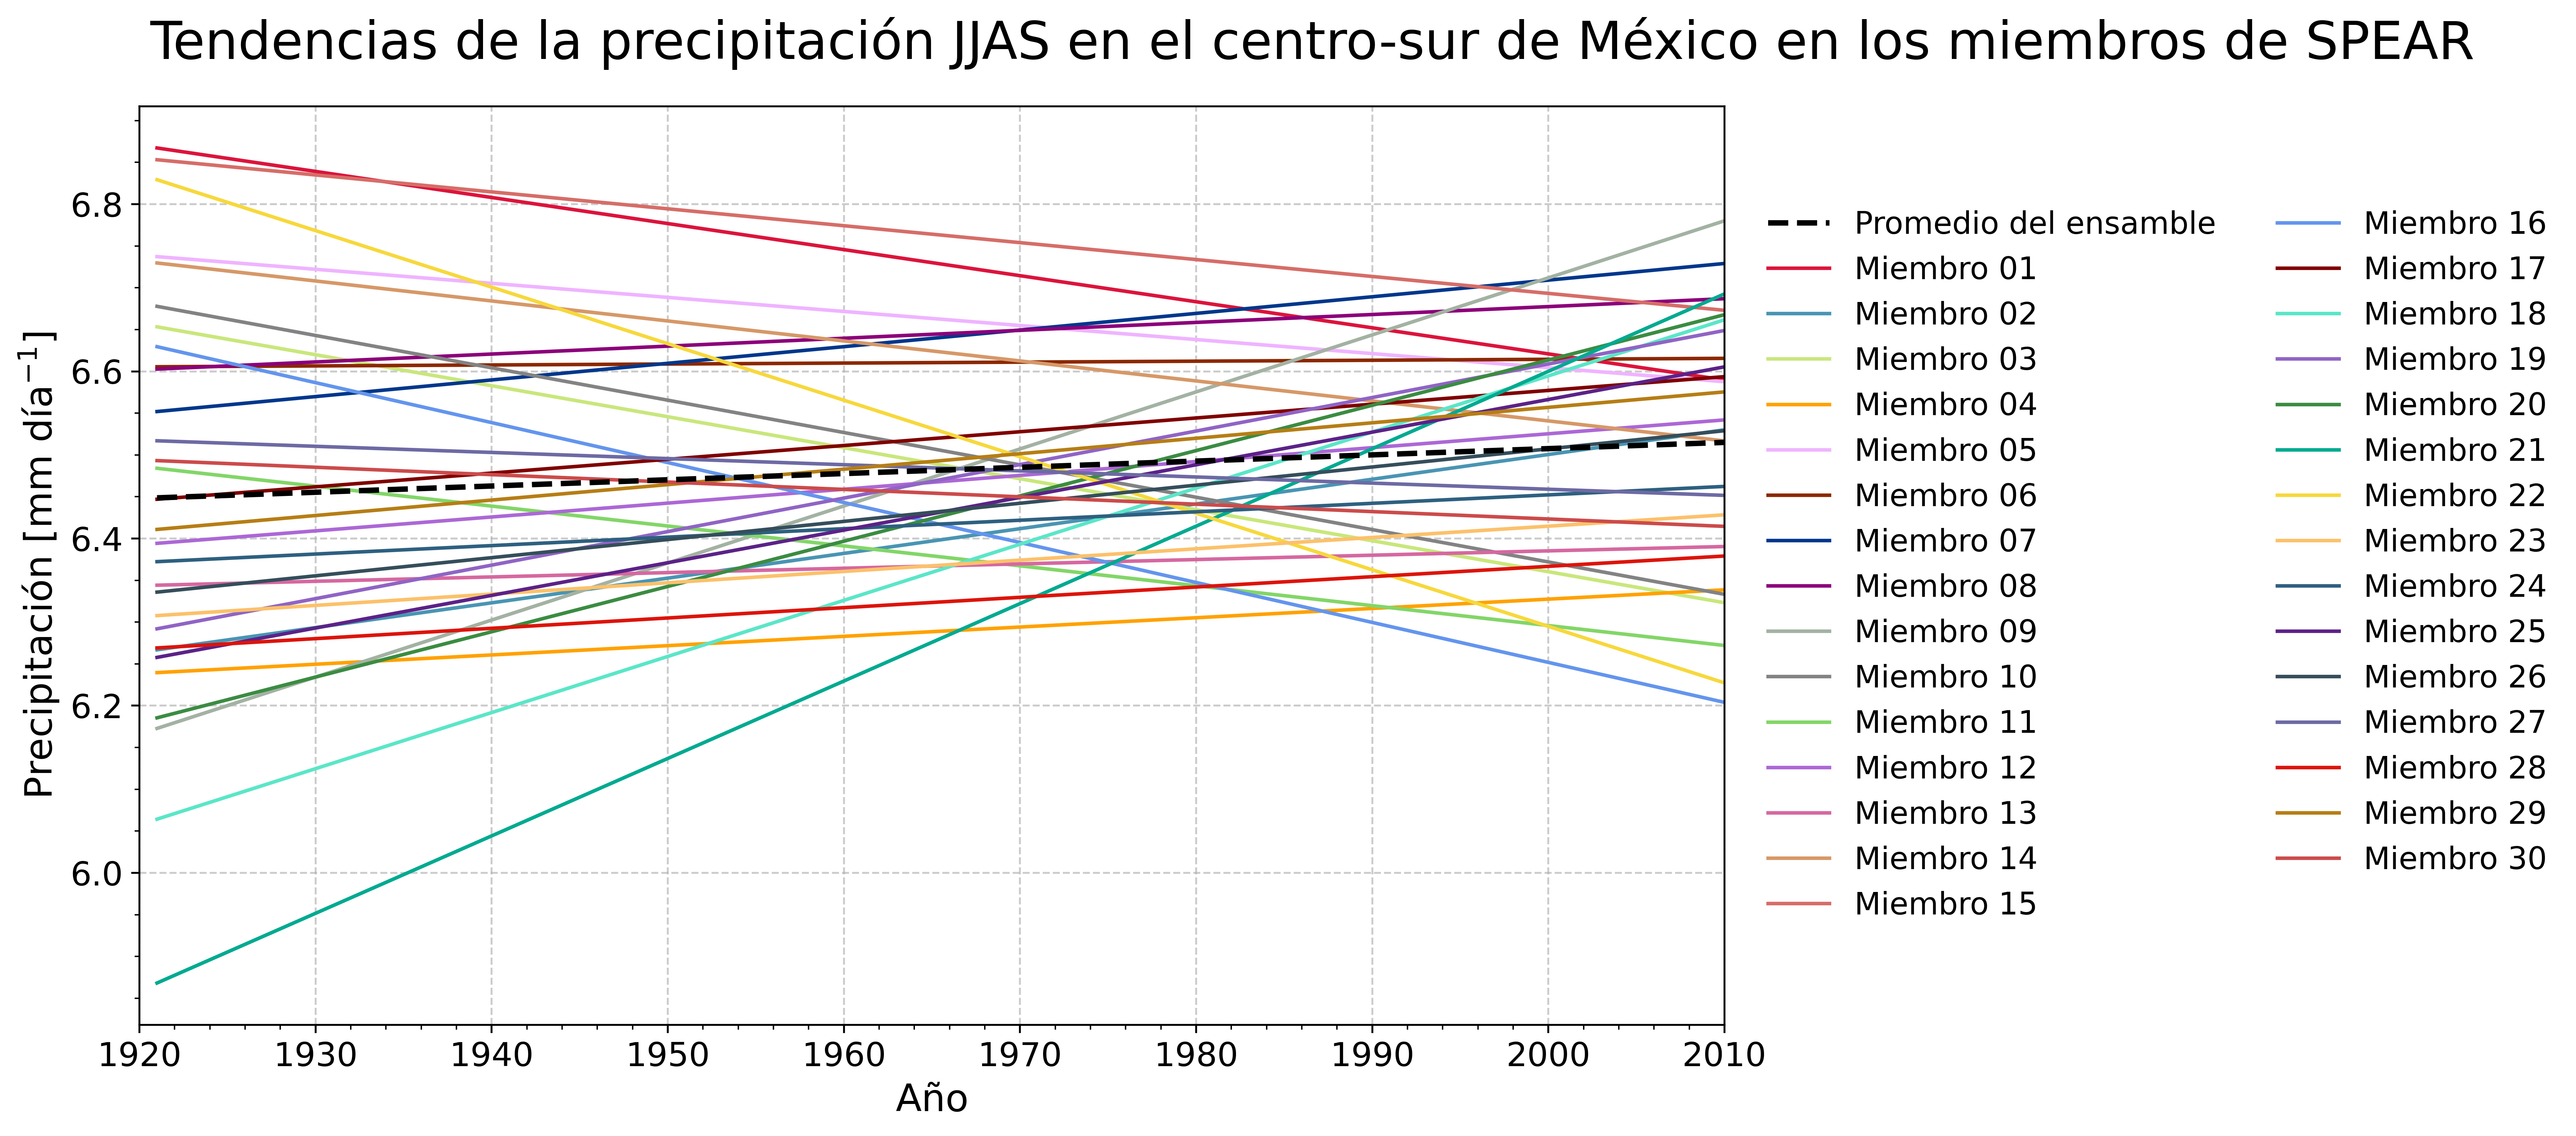

In [45]:
# Graficamos los datos de todos los miembros y la del promedio del ensamble
plt.figure(figsize=(12,7), dpi=500)
plt.plot(X2, mean_precipitation_ensemble,linewidth=2.3, linestyle='--', color='black', label='Promedio del ensamble', zorder=100)  
plt.plot(X2, predicciones[0], color='crimson', label='Miembro 01')  
plt.plot(X2, predicciones[1], color='#4995b3', label='Miembro 02')  
plt.plot(X2, predicciones[2], color='#c9e77c', label='Miembro 03')     
plt.plot(X2, predicciones[3], color='#ffa200', label='Miembro 04')     
plt.plot(X2, predicciones[4], color='#efb4ff', label='Miembro 05')     
plt.plot(X2, predicciones[5], color='#8c2800', label='Miembro 06')     
plt.plot(X2, predicciones[6], color='#00378c', label='Miembro 07')     
plt.plot(X2, predicciones[7], color='#8c007b', label='Miembro 08')     
plt.plot(X2, predicciones[8], color='#a3b2a3', label='Miembro 09') 
plt.plot(X2, predicciones[9], color='#838383', label='Miembro 10')     
plt.plot(X2, predicciones[10], color='#83d668', label='Miembro 11')    
plt.plot(X2, predicciones[11], color='#ac68d6', label='Miembro 12')    
plt.plot(X2, predicciones[12], color='#d668a0', label='Miembro 13')   
plt.plot(X2, predicciones[13], color='#d69868', label='Miembro 14')  
plt.plot(X2, predicciones[14], color='#d66d68', label='Miembro 15')    
plt.plot(X2, predicciones[15], color='cornflowerblue', label='Miembro 16')     
plt.plot(X2, predicciones[16], color='maroon', label='Miembro 17')     
plt.plot(X2, predicciones[17], color='#5be6c8', label='Miembro 18')     
plt.plot(X2, predicciones[18], color='#9064c5', label='Miembro 19')     
plt.plot(X2, predicciones[19], color='#3b8c42', label='Miembro 20')     
plt.plot(X2, predicciones[20], color='#00aa90', label='Miembro 21')     
plt.plot(X2, predicciones[21], color='#f7d83c', label='Miembro 22')     
plt.plot(X2, predicciones[22], color='#fcc16b', label='Miembro 23')     
plt.plot(X2, predicciones[23], color='#2e6080', label='Miembro 24')     
plt.plot(X2, predicciones[24], color='#5c2288', label='Miembro 25')     
plt.plot(X2, predicciones[25], color='#354e5b', label='Miembro 26')     
plt.plot(X2, predicciones[26], color='#6d6aa4', label='Miembro 27')     
plt.plot(X2, predicciones[27], color='#dd140b', label='Miembro 28')     
plt.plot(X2, predicciones[28], color='#b67e15', label='Miembro 29')     
plt.plot(X2, predicciones[29], color='#cc4b4b', label='Miembro 30')     

lineplot_setup(1920, 2010,'Año','Precipitación [mm día$^{-1}$]',title='Tendencias de la precipitación JJAS en el centro-sur de México en los miembros de SPEAR',legend=True)
ax = plt.gca() 
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=13, ncol=2, frameon=False)

In [46]:
trend_01=np.load('pendiente_01_SPEAR.npy')

### Ahora cargamos los datos de las tendencias de cada dataset

In [47]:
predicciones_gpcc=np.load('predicciones_GPCC.npy')
predicciones_gpcc_mean=predicciones_gpcc.mean()
predicciones_gpcc

array([6.60596951, 6.60526002, 6.60455052, 6.60384103, 6.60313154,
       6.60242205, 6.60171256, 6.60100306, 6.60029357, 6.59958408,
       6.59887459, 6.5981651 , 6.5974556 , 6.59674611, 6.59603662,
       6.59532713, 6.59461764, 6.59390814, 6.59319865, 6.59248916,
       6.59177967, 6.59107018, 6.59036068, 6.58965119, 6.5889417 ,
       6.58823221, 6.58752271, 6.58681322, 6.58610373, 6.58539424,
       6.58468475, 6.58397525, 6.58326576, 6.58255627, 6.58184678,
       6.58113729, 6.58042779, 6.5797183 , 6.57900881, 6.57829932,
       6.57758983, 6.57688033, 6.57617084])

In [48]:
predicciones_gpcp=np.load('predicciones_GPCP.npy')
predicciones_gpcp_mean=predicciones_gpcp.mean()
predicciones_gpcp_mean

np.float64(6.74617528915405)

In [49]:
predicciones_mswep=np.load('predicciones_mswep.npy')
predicciones_mswep_mean=predicciones_mswep.mean()
predicciones_mswep_mean

np.float64(6.430195808410645)

In [50]:
# Graficamos promedio de las predicciones
predicciones = np.array(predicciones)

# Promedio de cada miembro del ens 
predicciones_ensmean = np.mean(predicciones, axis=1)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7), dpi=400)
plt.scatter(np.arange(1,31), predicciones_ensmean, color='slateblue', s=60)
plt.scatter([31], [predicciones.mean()], color='crimson', marker='.', label='SPEAR (1921-2010)', s=300)
plt.scatter([32], [predicciones_gpcc.mean()], color='orange', marker='.', label='GPCC (1982-2024)', s=300)
plt.scatter([33], [predicciones_gpcp.mean()], color='violet', marker='.', label='GPCP (1979-2024)', s=300)
plt.scatter([34], [predicciones_mswep.mean()], color='forestgreen', marker='.', label='MSWEP (1980-2023)', s=300)

x_labels = [f"Miembro {i}" for i in range(1, 31)] + ['SPEAR promedio', 'GPCC', 'GPCP', 'MSWEP']
x_positions = list(range(1, 35))
plt.xticks(ticks=x_positions, labels=x_labels, rotation=90, fontsize=12)

#plt.xlabel('Miembro del ensamble')
plt.ylabel('Precipitación [mm día$^{-1}$ siglo$^{-1}$]', fontsize=15)
plt.title("promedio de la precipitación en el centro-sur de México", fontsize=20)
plt.tight_layout()
plt.legend()
plt.show()

In [51]:
# Cargamos todas las tendencias de los datasets
tendencia_gpcc=np.load('pendiente_GPCC.npy')
tendencia_gpcp=np.load('pendiente_GPCP.npy')
tendencia_mswep=np.load('pendiente_MSWEP.npy')
tendencia_spear=np.load('pendiente_SPEAR_ens_1980.npy')
tendencia_spear21=np.load('pendiente_SPEAR_ens_1921.npy')

In [52]:
print(tendencia_gpcc,tendencia_gpcp,tendencia_mswep, tendencia_spear, tendencia_spear21)

-0.07094920707663464 -1.1367929272176747 -2.068273599421667 0.10564802154417961 0.0745355950935773


In [53]:
tendencias = []
for i in range(1, 31):
    file = f'pendiente_0{i}_SPEAR.npy'
    data = np.load(file)
    tendencias.append(data)

tendencias

[array(-0.00311838),
 array(0.00295742),
 array(-0.00370879),
 array(0.0011128),
 array(-0.00168126),
 array(0.00011277),
 array(0.0019904),
 array(0.00094608),
 array(0.00682341),
 array(-0.00387116),
 array(-0.00238197),
 array(0.00165908),
 array(0.00052012),
 array(-0.00239168),
 array(-0.00202394),
 array(-0.00478096),
 array(0.00164783),
 array(0.00671298),
 array(0.00401034),
 array(0.00541938),
 array(0.00926342),
 array(-0.00676375),
 array(0.00135417),
 array(0.00101137),
 array(0.0039056),
 array(0.00216973),
 array(-0.00073389),
 array(0.00123537),
 array(0.00184847),
 array(-0.00088424)]

In [54]:
df = pd.DataFrame({
    "Miembro": [f"Miembro {i}" for i in range(1, 31)],
    "Tendencia": tendencias})

In [55]:
#ESTE ES EL ORDEN CORRECTO DE LOS MIEMBROS, AUNQUE VIENEN 01, 010, 011, 012... etc, NO SE MODIFICAN manualmente abajo
print(df["Tendencia"]*100)

0    -0.311838
1     0.295742
2    -0.370879
3      0.11128
4    -0.168126
5     0.011277
6      0.19904
7     0.094608
8     0.682341
9    -0.387116
10   -0.238197
11    0.165908
12    0.052012
13   -0.239168
14   -0.202394
15   -0.478096
16    0.164783
17    0.671298
18    0.401034
19    0.541938
20    0.926342
21   -0.676375
22    0.135417
23    0.101137
24     0.39056
25    0.216973
26   -0.073389
27    0.123537
28    0.184847
29   -0.088424
Name: Tendencia, dtype: object


In [56]:
# es la tendencia promedio de los 30 
promedio=df["Tendencia"]*100
promedi=promedio.mean()
promedi

np.float64(0.07453574200241461)

In [57]:
# respecto a mswep
absolutam=0.926342-(-2.07)
#respecto a gpcp
absolutag=0.926342-(-1.14)
absolutag

2.0663419999999997

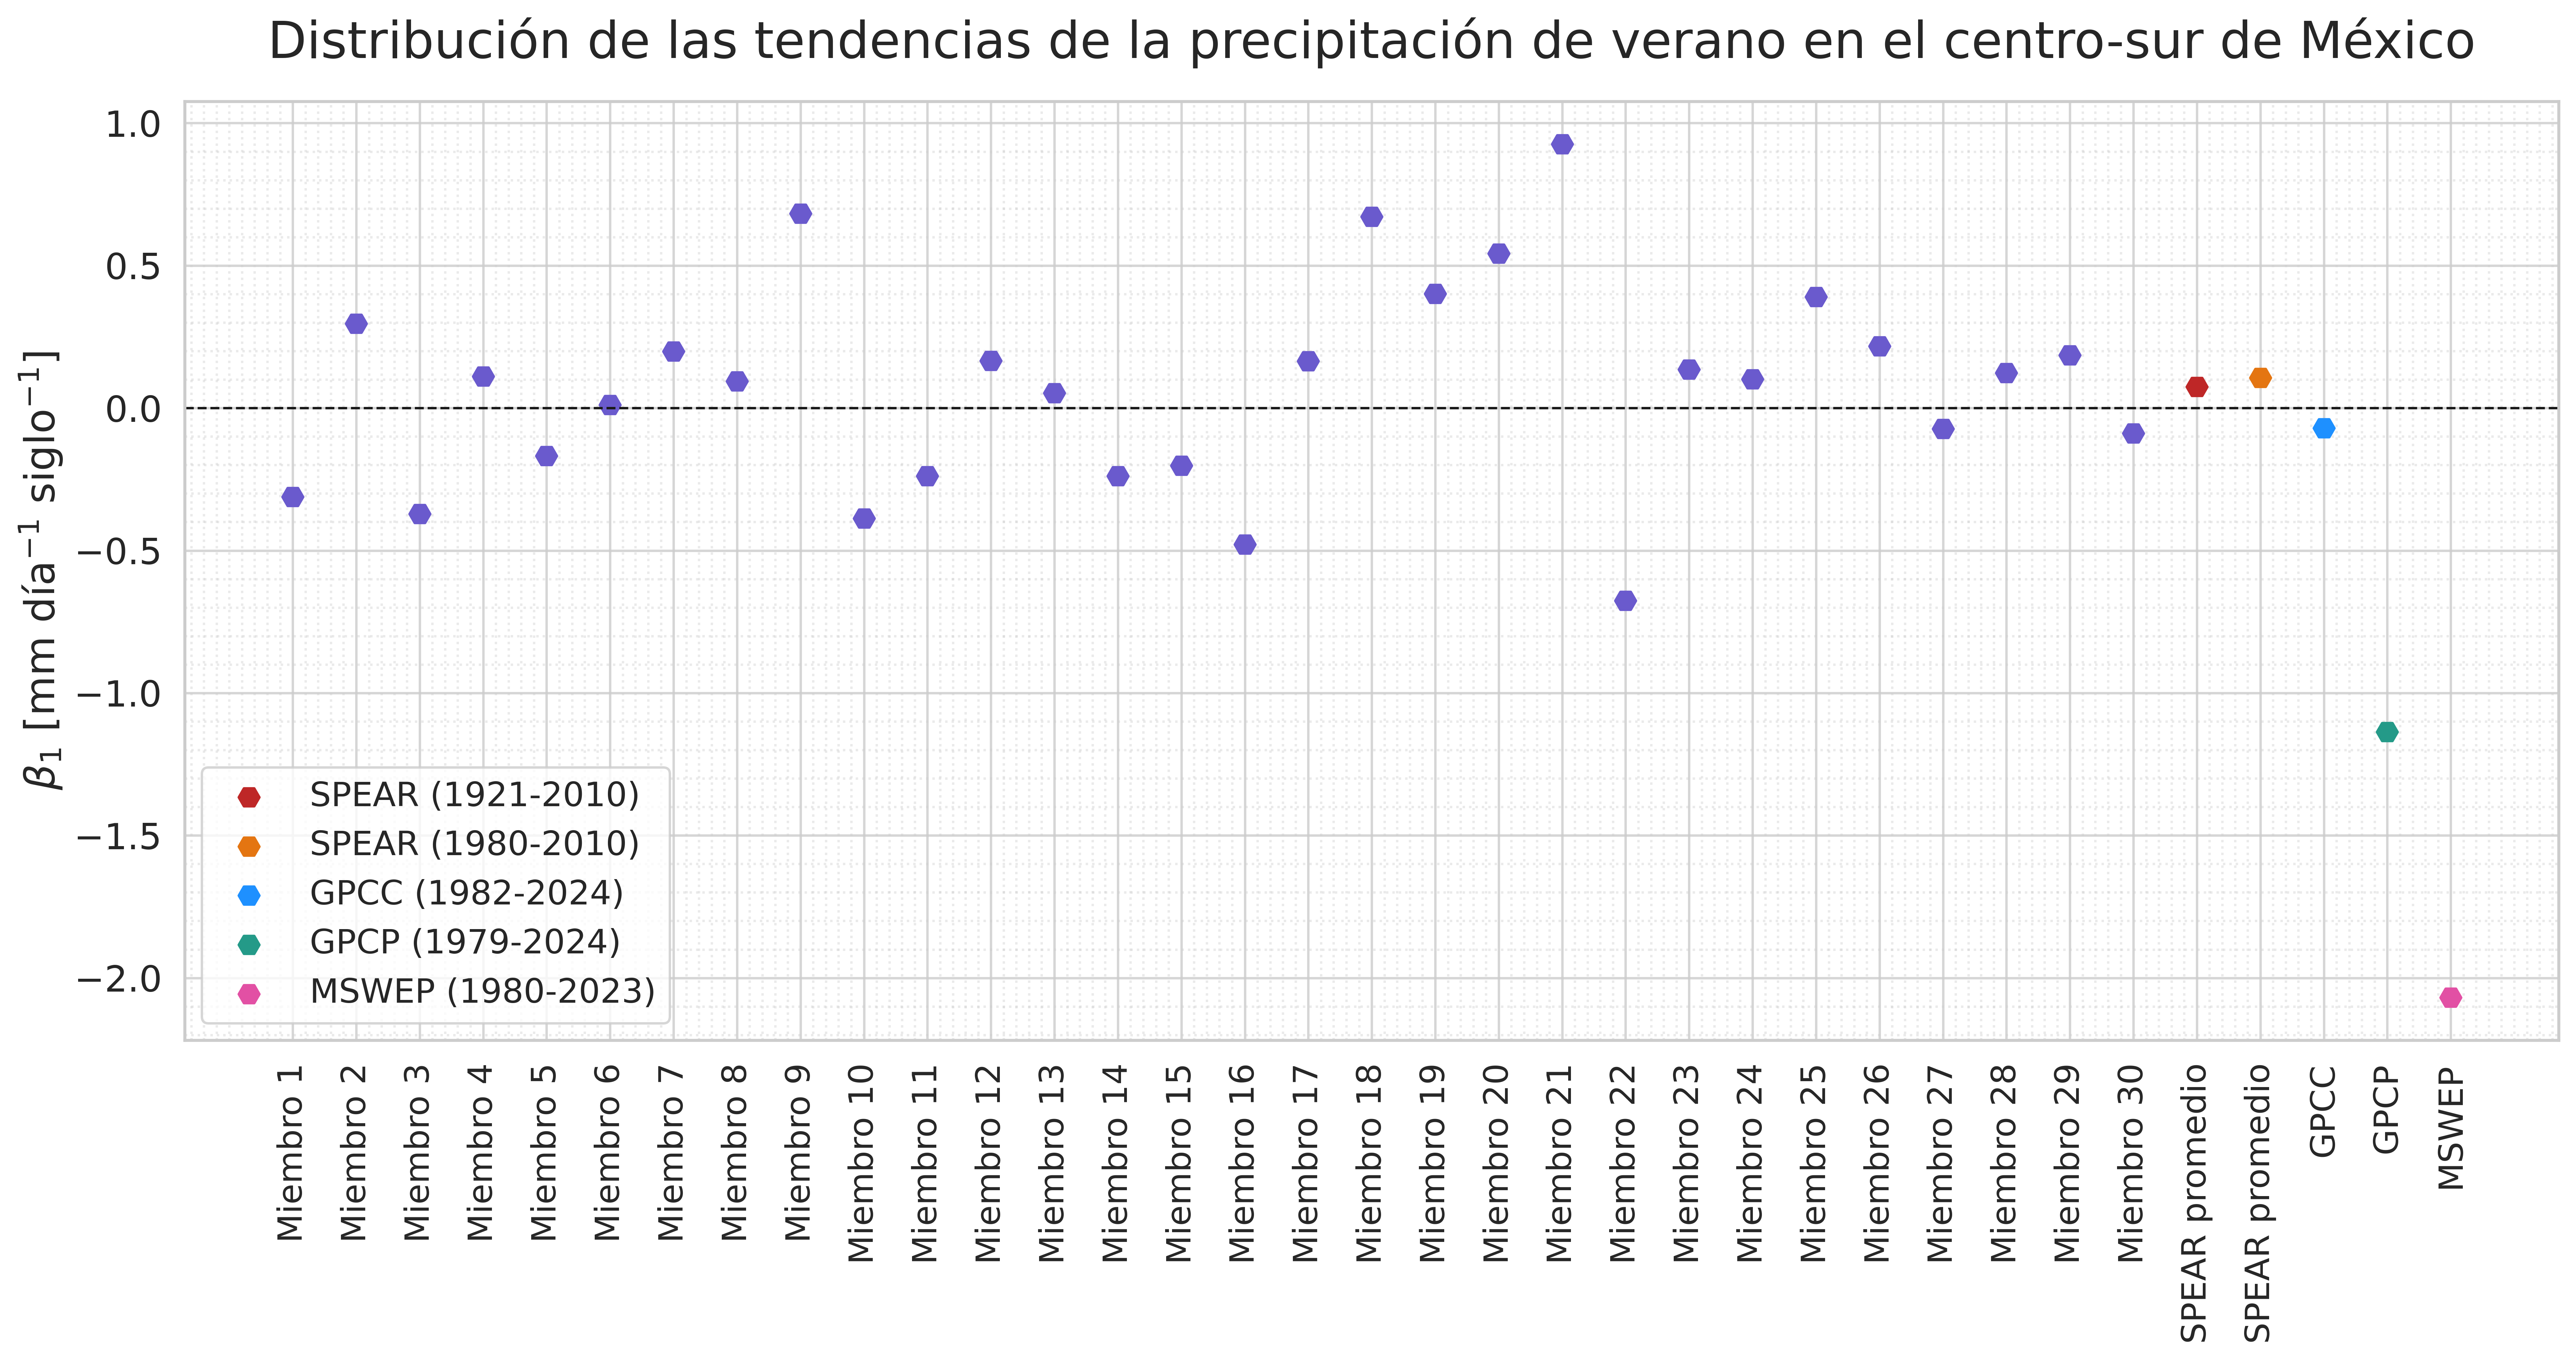

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8), dpi=500)
#plt.scatter(df["Miembro"], df["Tendencia"]*100, color='slateblue', marker='H', s=74)

plt.scatter([0], tendencias[0]*100, color='slateblue', marker='H', s=74)#, label='Miembro 01')  
plt.scatter([1], tendencias[1]*100, color='slateblue', marker='H', s=74)#, label='Miembro 02')  
plt.scatter([2], tendencias[2]*100, color='slateblue', marker='H', s=74)#, label='Miembro 03')  
plt.scatter([3], tendencias[3]*100, color='slateblue', marker='H', s=74)#, label='Miembro 04')  
plt.scatter([4], tendencias[4]*100, color='slateblue', marker='H', s=74)#, label='Miembro 05')  
plt.scatter([5], tendencias[5]*100, color='slateblue', marker='H', s=74)#, label='Miembro 06')  
plt.scatter([6], tendencias[6]*100, color='slateblue', marker='H', s=74)#, label='Miembro 07')  
plt.scatter([7], tendencias[7]*100, color='slateblue', marker='H', s=74)#, label='Miembro 08')  
plt.scatter([8], tendencias[8]*100, color='slateblue', marker='H', s=74)#, label='Miembro 09')  
plt.scatter([9], tendencias[9]*100, color='slateblue', marker='H', s=74)#, label='Miembro 10')  
plt.scatter([10], tendencias[10]*100, color='slateblue', marker='H', s=74)#, label='Miembro 11')  
plt.scatter([11], tendencias[11]*100, color='slateblue', marker='H', s=74)#, label='Miembro 12')
plt.scatter([12], tendencias[12]*100, color='slateblue', marker='H', s=74)#, label='Miembro 13')  
plt.scatter([13], tendencias[13]*100, color='slateblue', marker='H', s=74)#, label='Miembro 14')  
plt.scatter([14], tendencias[14]*100, color='slateblue', marker='H', s=74)#, label='Miembro 15')  
plt.scatter([15], tendencias[15]*100, color='slateblue', marker='H', s=74)#, label='Miembro 16')  
plt.scatter([16], tendencias[16]*100, color='slateblue', marker='H', s=74)#, label='Miembro 17')  
plt.scatter([17], tendencias[17]*100, color='slateblue', marker='H', s=74)#, label='Miembro 18')  
plt.scatter([18], tendencias[18]*100, color='slateblue', marker='H', s=74)#, label='Miembro 19')  
plt.scatter([19], tendencias[19]*100, color='slateblue', marker='H', s=74)#, label='Miembro 20')  
plt.scatter([20], tendencias[20]*100, color='slateblue', marker='H', s=74)#, label='Miembro 21')
plt.scatter([21], tendencias[21]*100, color='slateblue', marker='H', s=74)#, label='Miembro 22')  
plt.scatter([22], tendencias[22]*100, color='slateblue', marker='H', s=74)#, label='Miembro 23')  
plt.scatter([23], tendencias[23]*100, color='slateblue', marker='H', s=74)#, label='Miembro 24')  
plt.scatter([24], tendencias[24]*100, color='slateblue', marker='H', s=74)#, label='Miembro 25')  
plt.scatter([25], tendencias[25]*100, color='slateblue', marker='H', s=74)#, label='Miembro 26')  
plt.scatter([26], tendencias[26]*100, color='slateblue', marker='H', s=74)#, label='Miembro 27')  
plt.scatter([27], tendencias[27]*100, color='slateblue', marker='H', s=74)#, label='Miembro 28')  
plt.scatter([28], tendencias[28]*100, color='slateblue', marker='H', s=74)#, label='Miembro 29')  
plt.scatter([29], tendencias[29]*100, color='slateblue', marker='H', s=74)#, label='Miembro 30')  

plt.scatter([30], tendencia_spear21, color='#be2727', marker='H', s=74, label='SPEAR (1921-2010)', zorder=100)
plt.scatter([31], tendencia_spear, color='#e47511', marker='H', s=74, label='SPEAR (1980-2010)')
plt.scatter([32], tendencia_gpcc, color='dodgerblue', marker='H', s=74, label='GPCC (1982-2024)')
plt.scatter([33], tendencia_gpcp, color='#249a88', marker='H', s=74, label='GPCP (1979-2024)')
plt.scatter([34], tendencia_mswep, color='#e250a4', marker='H', s=74, label='MSWEP (1980-2023)')

x_labels = [f"Miembro {i}" for i in range(1, 31)] + ['SPEAR promedio', 'SPEAR promedio', 'GPCC', 'GPCP', 'MSWEP']
x_positions = list(range(0, 35))
plt.xticks(ticks=x_positions, labels=x_labels, rotation=90, fontsize=14)
plt.grid(True, which='major', linestyle='-', alpha=0.8)  
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', alpha=0.4)  
plt.yticks(fontsize=15)
plt.axhline(0, color='k', linestyle='--', linewidth=1)

plt.ylabel(r"$\beta_{\mathrm{1}}$ [mm día$^{-1}$ siglo$^{-1}$]", fontsize=17)
plt.title("Distribución de las tendencias de la precipitación de verano en el centro-sur de México", fontsize=21, pad=18, x=0.5)
plt.legend(fontsize=14, loc='lower left',)
plt.tight_layout()
plt.show()

In [59]:
# Creamos un subplot con las tendencias en gráfico de dispersión y con pendientes
sns.set(style="whitegrid")

# creamos la fig.
fig = plt.figure(figsize=(19, 13), dpi=600)
# 2 filas y 4 columnas
gs = gridspec.GridSpec(2, 4, height_ratios=[2.6, 2.2])

# Primer panel ocupa 3 de 4 columnas 
ax1 = fig.add_subplot(gs[0, 0:3])  

ax2 = fig.add_subplot(gs[1, :]) 

# líneas
ax1.plot(X2, mean_precipitation_ensemble, linewidth=2.3, linestyle='--', color='black', label='Promedio del ensamble', zorder=100)

for i, color in zip(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],
    ['crimson','#4995b3','#c9e77c','#ffa200','#efb4ff','#8c2800','#00378c','#8c007b','#a3b2a3',
     '#838383','#83d668','#ac68d6','#d668a0','#d69868','#d66d68','cornflowerblue','maroon','#5be6c8',
     '#9064c5','#3b8c42','#00aa90','#f7d83c','#fcc16b','#2e6080','#5c2288','#354e5b','#6d6aa4','#dd140b',
     '#b67e15','#cc4b4b']):
    ax1.plot(X2, predicciones[i], color=color, label=f'Miembro {i+1}')

# Ordenamos la leyenda por número de miembro
handles, labels = ax.get_legend_handles_labels()

miembro_items = []
otros_items = []

for h, l in zip(handles, labels):
    if l.startswith("Miembro"):
        try:
            numero = int(l.split()[-1])
            miembro_items.append((numero, h, l))  # Guarda número, handle y el label
        except ValueError:
            otros_items.append((h, l)) 
    else:
        otros_items.append((h, l)) # es mean ens

miembro_items_sorted = sorted(miembro_items, key=lambda x: x[0])

# Agregar el mean al principio
sorted_handles = [h for h, l in otros_items] + [h for _, h, _ in miembro_items_sorted]
sorted_labels  = [l for h, l in otros_items] + [l for _, _, l in miembro_items_sorted]

ax1.set_xlim(1920, 2010)
ax1.set_xlabel('Año', fontsize=18.5)
ax1.set_ylabel('Precipitación [mm día$^{-1}$]', fontsize=18.5)
ax1.set_title('Tendencias de la precipitación JJAS en el centro-sur de México en los miembros de SPEAR', fontsize=24, pad=24, x=0.76)
ax1.tick_params(axis='both', labelsize=18.5)
ax1.grid(True, which='major', linestyle='--', alpha=0.8)  
#ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=14, ncol=2, frameon=False)
ax1.legend(sorted_handles, sorted_labels, loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=14.5, ncol=2, frameon=False)


# Grafica del scatter plot
# Tendencias de miembros ordenados a mano
orden = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
for i, pos in enumerate(range(30)):
    ax2.scatter([pos], [tendencias[orden[i]]*100], color='slateblue', marker='H', s=80)

# Tendencias observacionales y promedios ens
ax2.scatter([30], tendencia_spear21, color='#be2727', marker='H', s=80, label='SPEAR (1921–2010)', zorder=100)
ax2.scatter([31], tendencia_spear, color='#e47511', marker='H', s=80, label='SPEAR (1980–2010)')
ax2.scatter([32], tendencia_gpcc, color='dodgerblue', marker='H', s=80, label='GPCC (1982–2024)')
ax2.scatter([33], tendencia_gpcp, color='#249a88', marker='H', s=80, label='GPCP (1979–2024)')
ax2.scatter([34], tendencia_mswep, color='#e250a4', marker='H', s=80, label='MSWEP (1980–2023)')

# Eje x
x_labels = [f"Miembro {i}" for i in range(1, 31)] + ['SPEAR promedio', 'SPEAR promedio', 'GPCC', 'GPCP', 'MSWEP']
x_positions = list(range(0, 35))
ax2.set_xticks(x_positions)
ax2.set_xticklabels(x_labels, rotation=90, fontsize=17.5)
ax2.grid(True, which='major', linestyle='-', alpha=0.8)
ax2.minorticks_on()
ax2.grid(True, which='minor', linestyle=':', alpha=0.4)
ax2.tick_params(axis='both', labelsize=18.5)  


ax2.axhline(0, color='k', linestyle='--', linewidth=1)
ax2.set_ylabel(r"$\beta_{\mathrm{1}}$ [mm día$^{-1}$ siglo$^{-1}$]", fontsize=18.5)
ax2.set_title("Distribución de las tendencias de la precipitación de verano en el centro-sur de México", fontsize=24, pad=18, x=0.5)
ax2.legend(fontsize=15, loc='lower left')

plt.tight_layout()
plt.show()

In [60]:
#miembro 10 es -0.387 y 15 -0.2

In [61]:
#ens20=np.load('predicciones_013_SPEAR.npy')

In [62]:
#datos_boxplot = [ens20, trend_gpcc, trend_gpcP, trend_mswep]

#plt.figure(figsize=(10, 5))
#plt.boxplot(datos_boxplot, positions=[1, 2, 3, 4], widths=0.6)
# es el eje x
#plt.xticks([1, 2, 3, 4], ['SPEAR', 'GPCC', 'GPCP', 'MSWEP'])
#plt.ylabel('Precipitación [mm día$^{-1}$ siglo$^{-1}$]')
#plt.title('Distribución de tendencias: modelo vs observaciones')
#plt.grid(True, linestyle='--', alpha=0.5)
#plt.tight_layout()
#plt.show()

In [63]:
print(predicciones.shape)

(30, 90)


In [64]:
datos_boxplot = [predicciones_ensmean, predicciones_gpcc, predicciones_gpcp, predicciones_mswep]

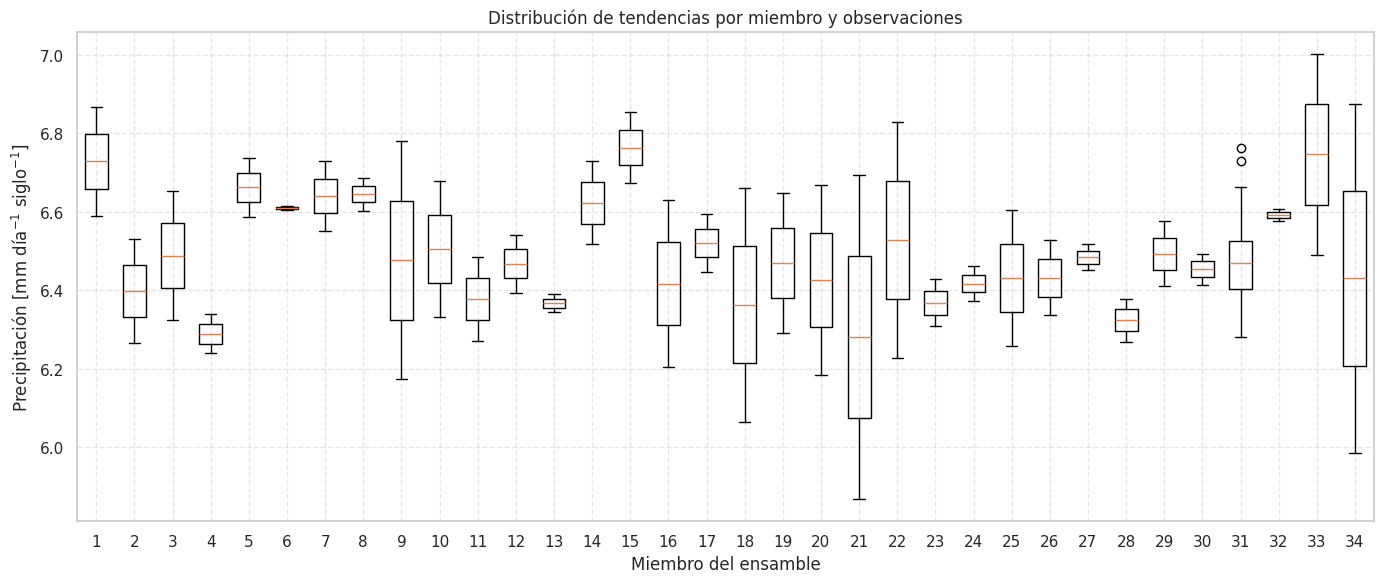

In [65]:
# un boxplot de la distribucion de miembros y observaciones
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.boxplot(predicciones.T, positions=np.arange(1, 31), widths=0.6)
plt.boxplot(datos_boxplot, positions=[31, 32, 33, 34], widths=0.6)
plt.xlabel("Miembro del ensamble")
plt.ylabel("Precipitación [mm día$^{-1}$ siglo$^{-1}$]")
plt.title("Distribución de tendencias por miembro y observaciones")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

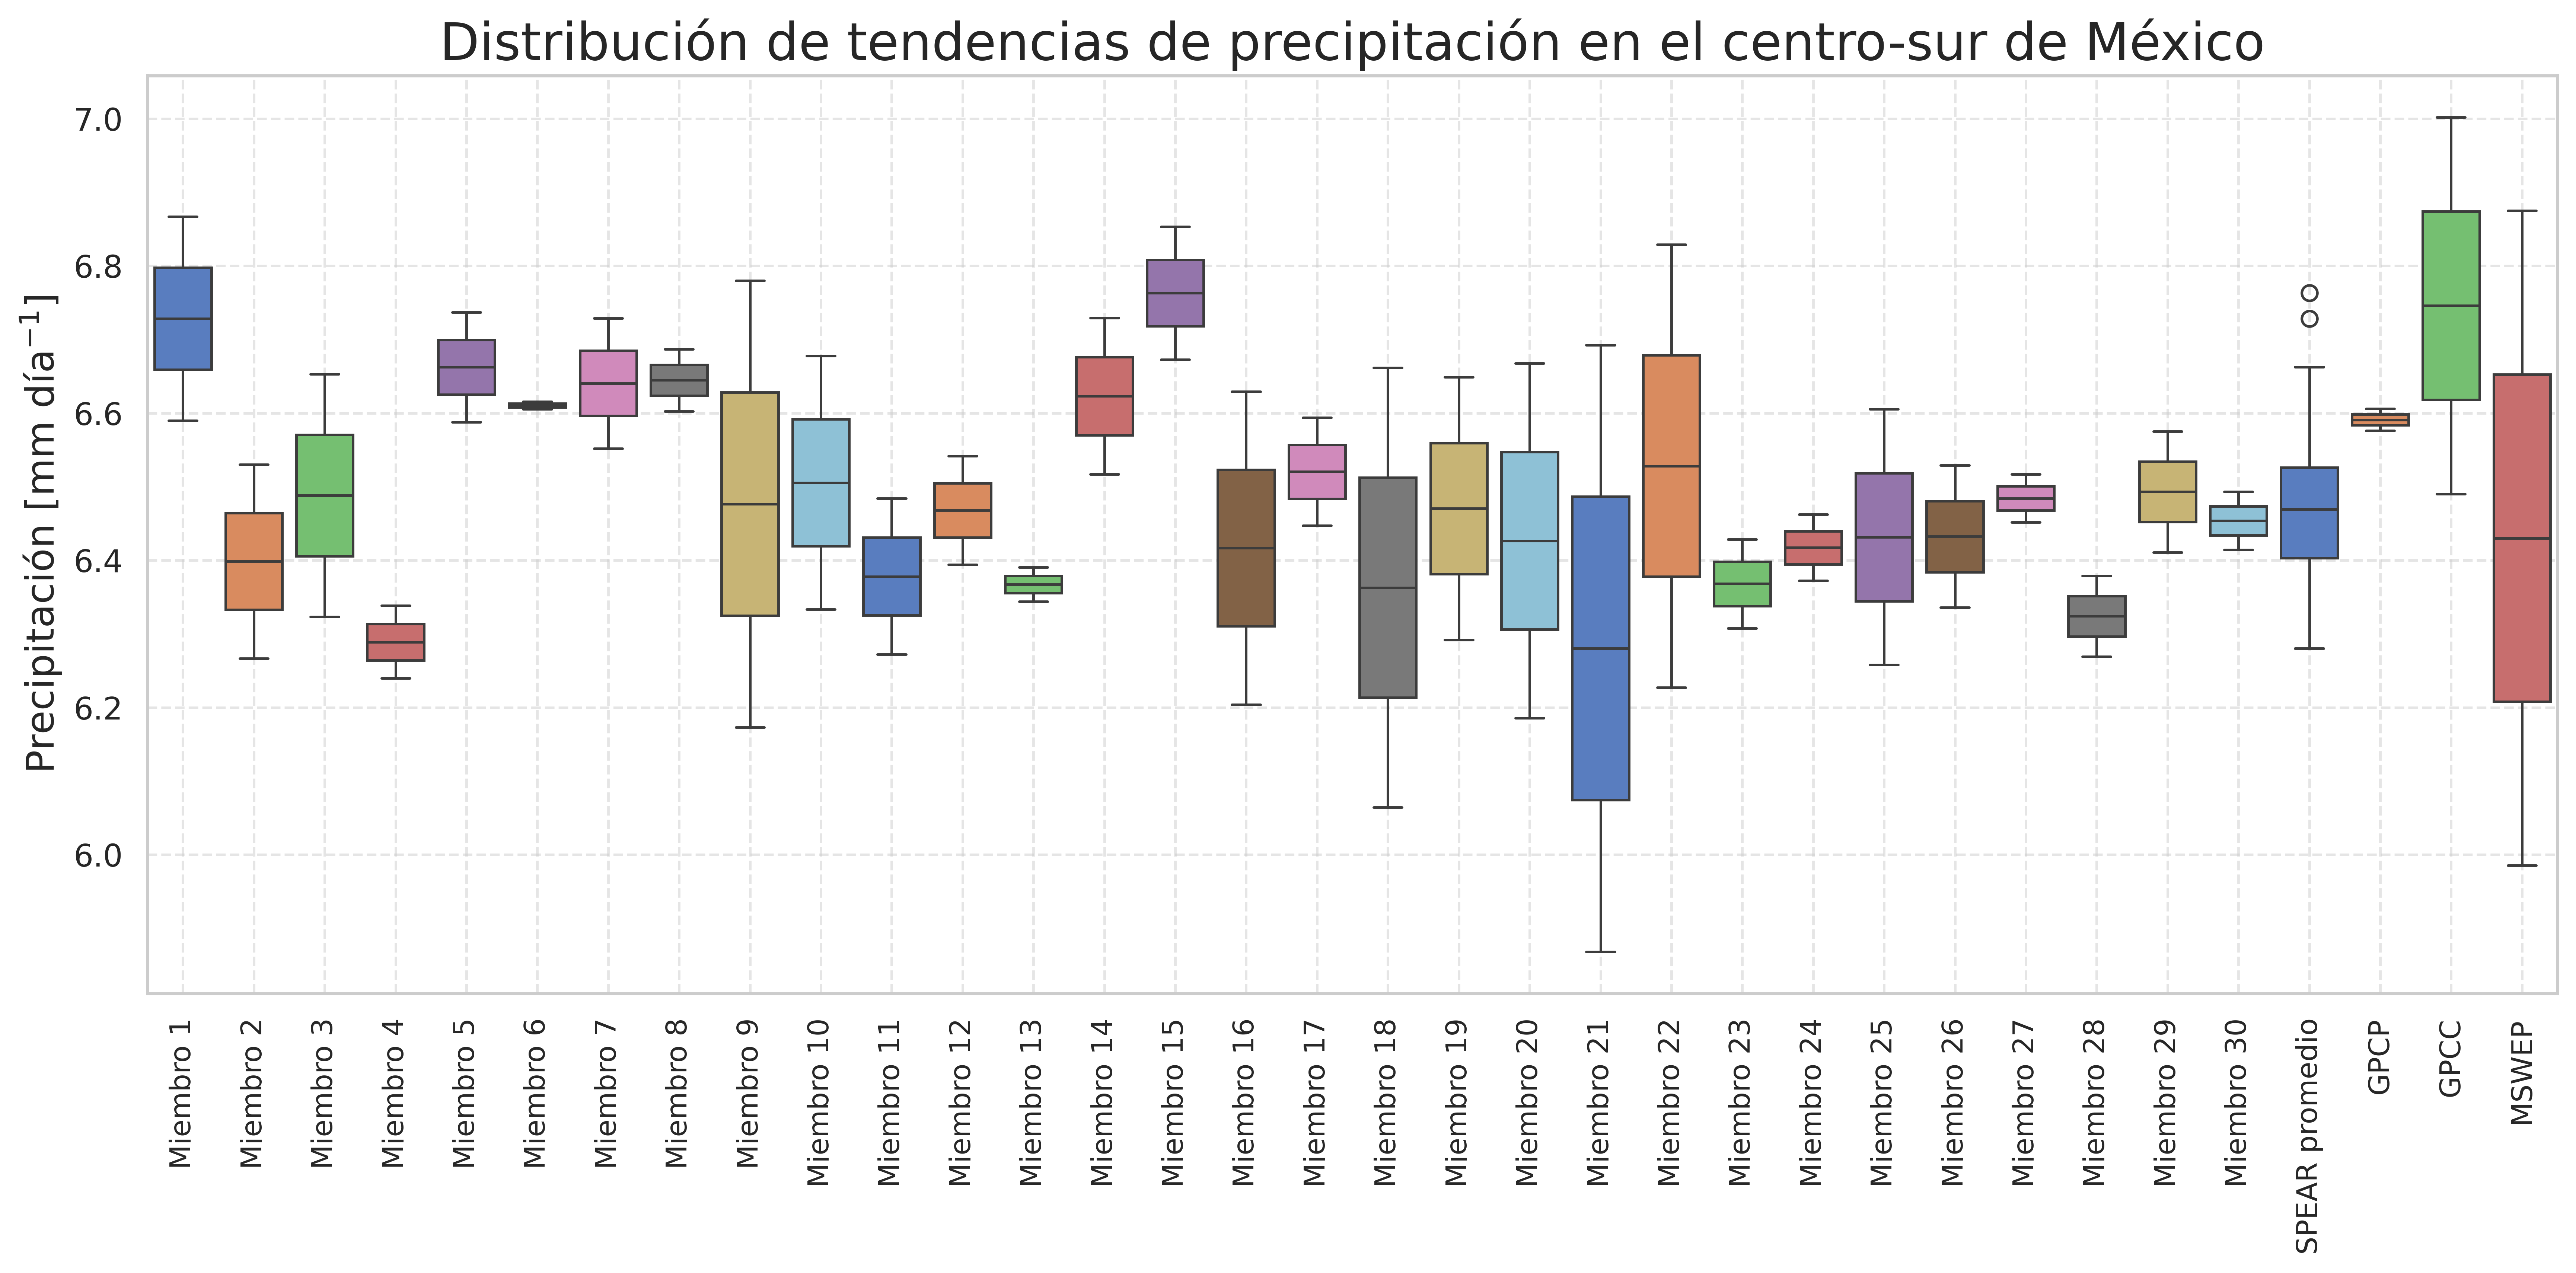

In [66]:
miembro = []
tendencia = []

# miembros del ensamble
for i in range(30):
    for val in predicciones[i]:
        miembro.append(f"Miembro {i+1}")
        tendencia.append(val)

# observacionales
obs_labels = ["SPEAR promedio","GPCP", "GPCC", "MSWEP"]
for i, obs in enumerate(datos_boxplot):
    for val in obs:
        miembro.append(obs_labels[i])
        tendencia.append(val)

df = pd.DataFrame({"Miembro": miembro,"Tendencia": tendencia})

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7), dpi=500)
sns.boxplot(data=df, x="Miembro", y="Tendencia", palette="muted", hue="Miembro")
plt.xlabel("")
plt.ylabel("Precipitación [mm día$^{-1}$]", fontsize=15)
plt.title("Distribución de tendencias de precipitación en el centro-sur de México", fontsize=20)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()